# Explore here

In [1]:
# Your code here

import pandas as pd

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/4GeeksAcademy/k-means-project-tutorial/main/housing.csv')

df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


In [3]:
df_2 = df[['MedInc','Latitude','Longitude']]

df_2

,MedInc,Latitude,Longitude
0,8.3252,37.88,-122.23
1,8.3014,37.86,-122.22
2,7.2574,37.85,-122.24
3,5.6431,37.85,-122.25
4,3.8462,37.85,-122.25
...,...,...,...
20635,1.5603,39.48,-121.09
20636,2.5568,39.49,-121.21
20637,1.7000,39.43,-121.22
20638,1.8672,39.43,-121.32


In [4]:
# hacer el train test split

from sklearn.model_selection import train_test_split

# no hay que pasat "y"

X_train, X_test, _,_ = train_test_split(df_2,_,test_size=0.2,random_state=42)



In [6]:
from sklearn.cluster import KMeans

model = KMeans(n_clusters=6, random_state=42)

X_train['cluster'] = model.fit_predict(X_train)

X_train

,MedInc,Latitude,Longitude,cluster
14196,3.2596,32.71,-117.03,5
8267,3.8125,33.77,-118.16,1
17445,4.1563,34.66,-120.48,1
14265,1.9425,32.69,-117.11,5
2271,3.5542,36.78,-119.80,3
...,...,...,...,...
11284,6.3700,33.78,-117.96,4
11964,3.0500,34.02,-117.43,5
5390,2.9344,34.03,-118.38,5
860,5.7192,37.58,-121.96,0


In [7]:
X_test

,MedInc,Latitude,Longitude
20046,1.6812,36.06,-119.01
3024,2.5313,35.14,-119.46
15663,3.4801,37.80,-122.44
20484,5.7376,34.28,-118.72
9814,3.7250,36.62,-121.93
...,...,...,...
15362,4.6050,33.36,-117.22
16623,2.7266,35.36,-120.83
18086,9.2298,37.31,-122.05
2144,2.7850,36.77,-119.76


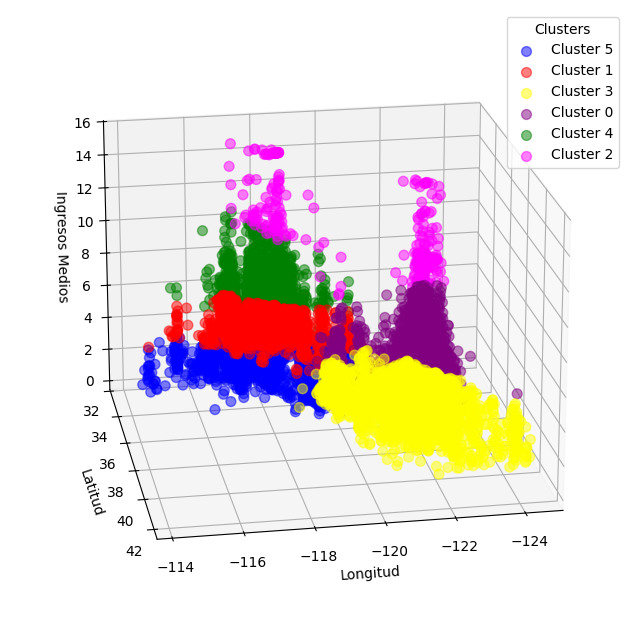

In [8]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111,projection='3d')

colors=['blue','red','yellow','purple','green','magenta']

for i,color in zip(X_train['cluster'].unique(),colors):
    subset = X_train[X_train['cluster']==i]
    ax.scatter(subset['Longitude'],subset['Latitude'],subset['MedInc'],s=50,alpha=0.5,marker='o',c=[color],label=f'Cluster {i}')

ax.view_init(elev=20,azim=80)

ax.set_xlabel('Longitud')
ax.set_ylabel('Latitud')
ax.set_zlabel('Ingresos Medios')
ax.legend(title='Clusters')

plt.show()
#La función scatter() en Python se utiliza comúnmente para crear gráficos de dispersión (scatter plots) y es parte de la biblioteca Matplotlib (matplotlib.pyplot.scatter). Este tipo de gráfico es ideal para visualizar la relación entre dos variables, mostrando puntos en un plano cartesiano.


In [11]:
# Predicion del conjunto de test

X_test['cluster'] == model.predict(X_test)

KeyError: 'cluster'